<a href="https://colab.research.google.com/github/Areeff10/credit-card-prediction/blob/main/Credit_Card_Predicting_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier,RandomForestClassifier
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score

## Loading the dataset

In [2]:
dataset=pd.read_csv("/content/credit card.csv")
dataset.head(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


## Exploring the Dataset (EDA)

In [3]:
dataset.columns

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [ ]:
dataset.isnull().sum()

,0
Gender,0
Age,0
Debt,0
Married,0
BankCustomer,0
Industry,0
Ethnicity,0
YearsEmployed,0
PriorDefault,0
Employed,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


## Exploratory data analysis (EDA)

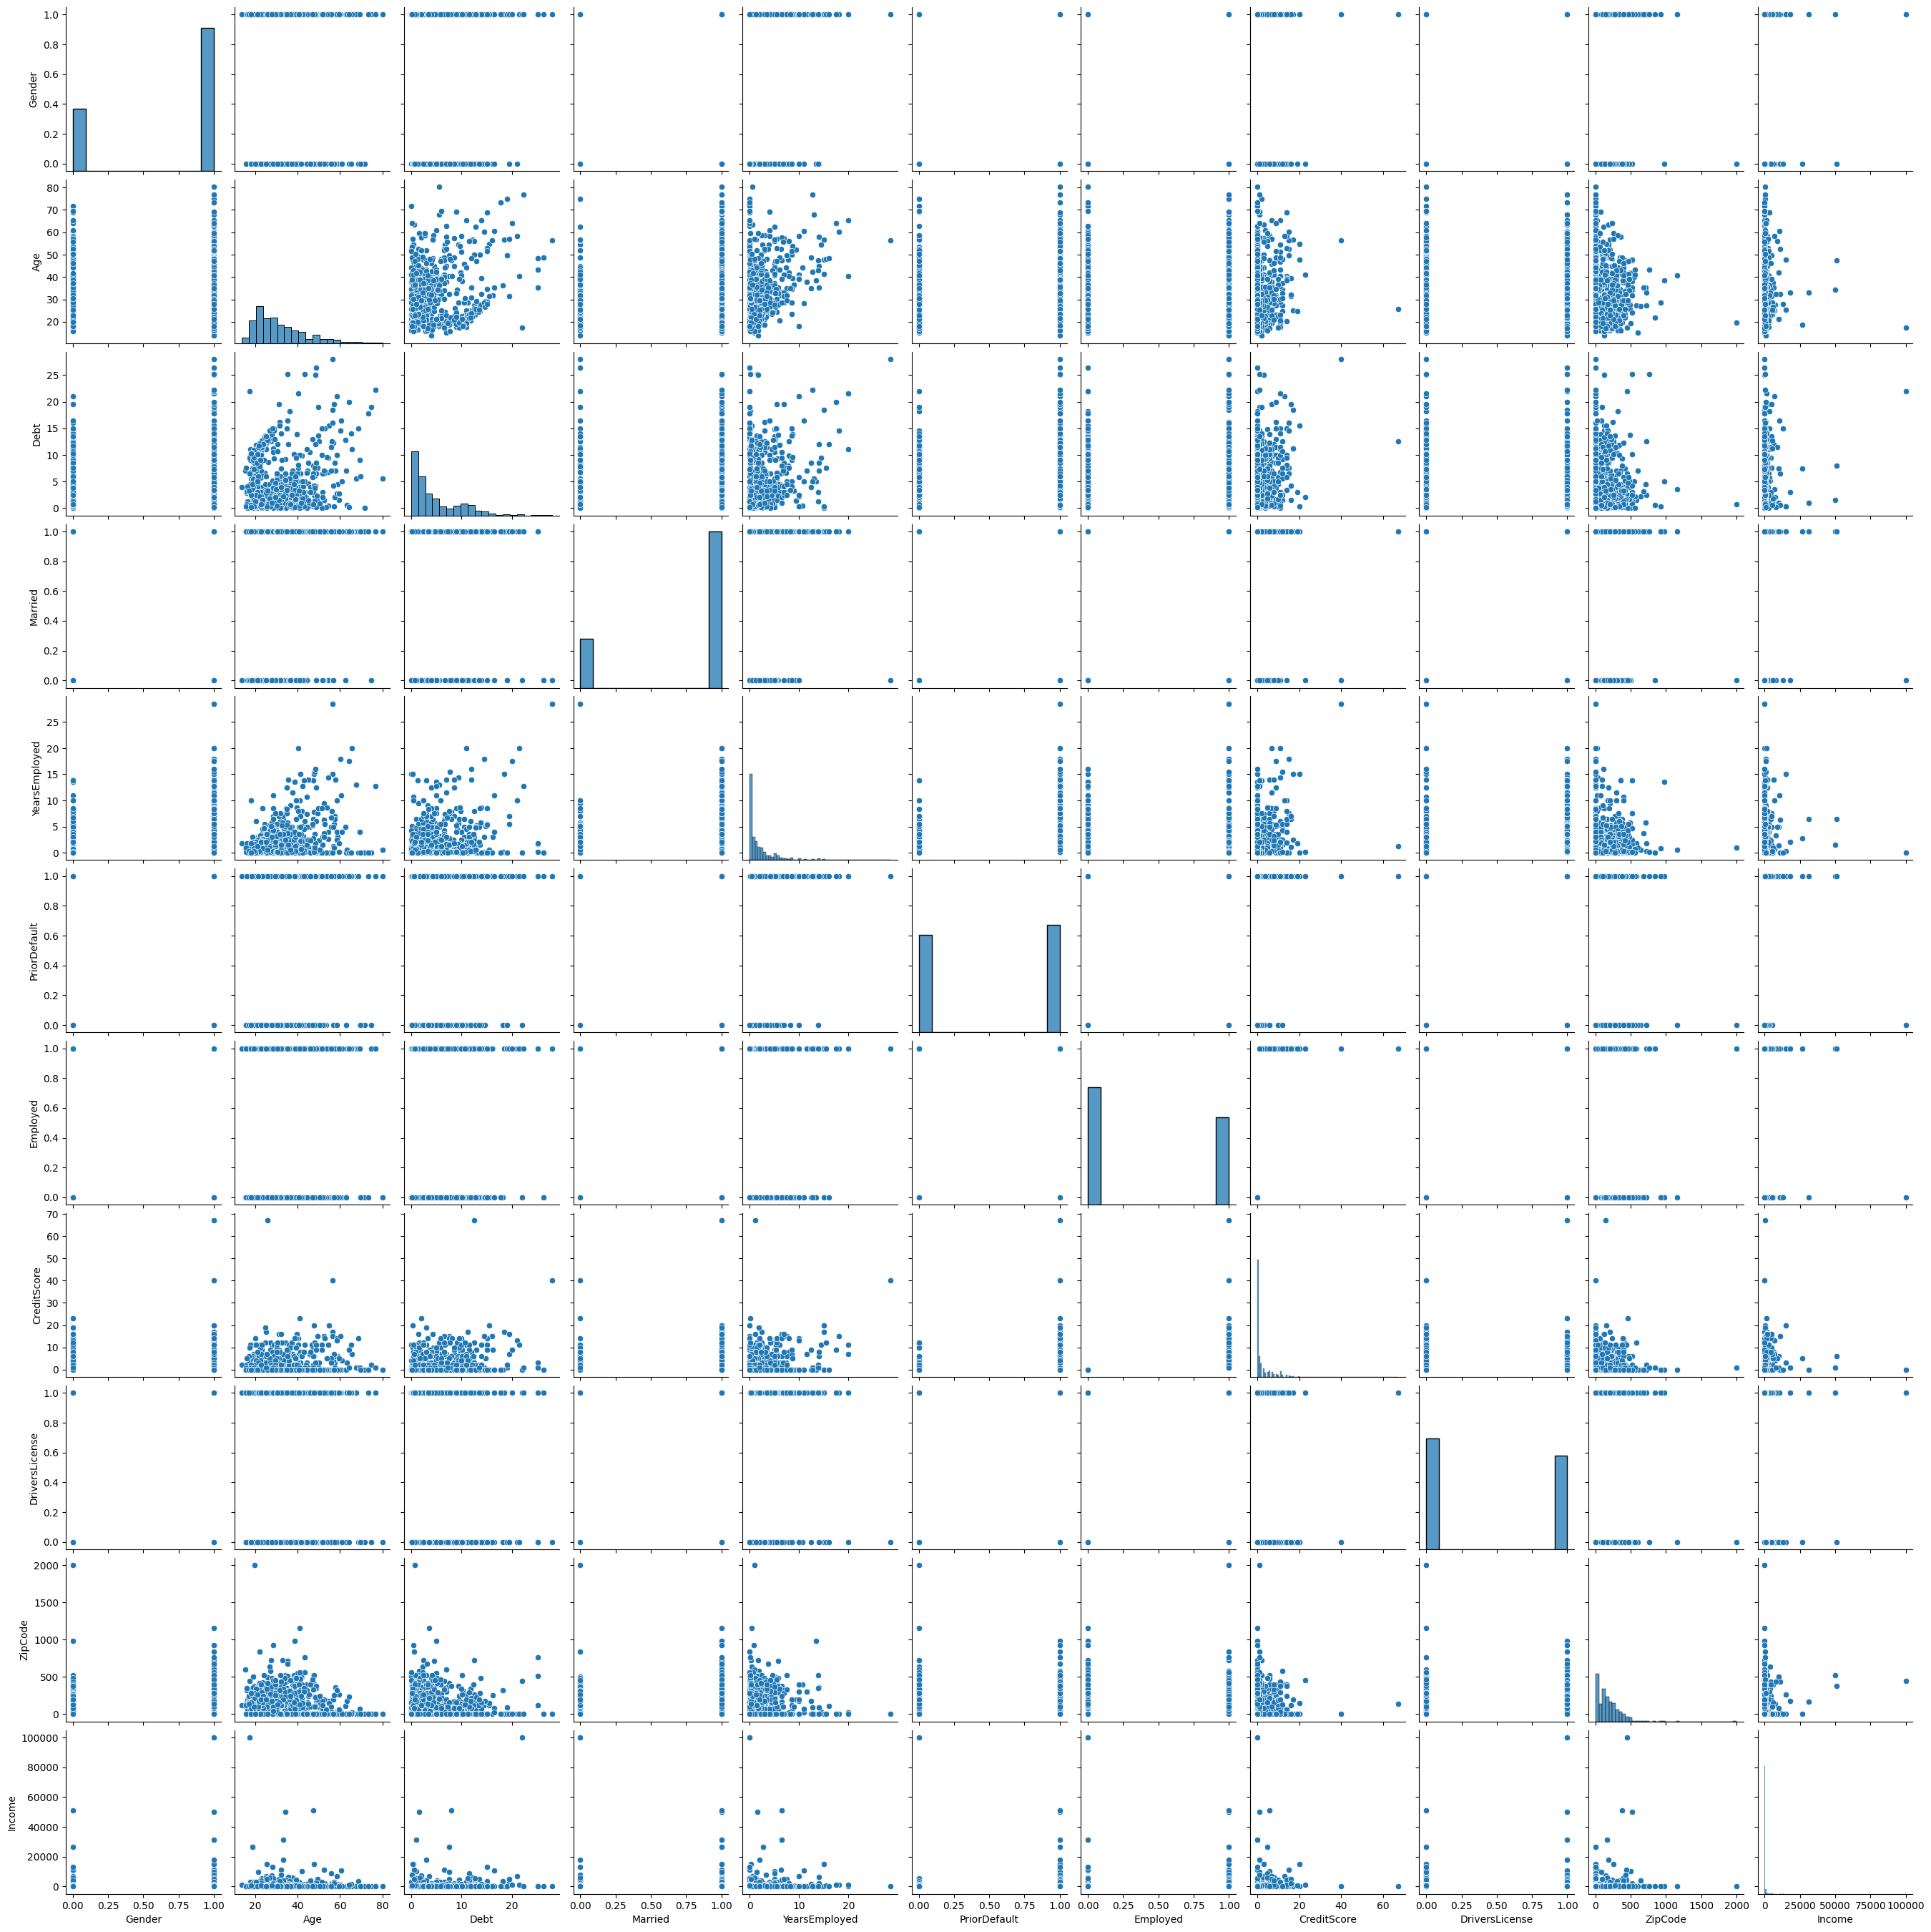

In [ ]:
pair_data=dataset[['Gender','Age', 'Debt', 'Married','YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore','DriversLicense','ZipCode','Income']]
sns.pairplot(data=pair_data)

<Axes: title={'center': 'Number of person taking loan groupby gender'}, xlabel='Gender', ylabel='count'>

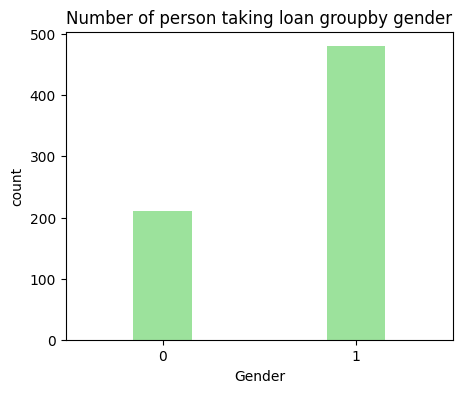

In [ ]:
plt.figure(figsize=(5,4))
plt.title("Number of person taking loan groupby gender")
sns.countplot(x="Gender",data=dataset,width=0.3,color='lightgreen')

<ipython-input-30-446eb39c04b9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Employed",data=dataset,width=0.3,palette='Set2')


<Axes: xlabel='Employed', ylabel='count'>

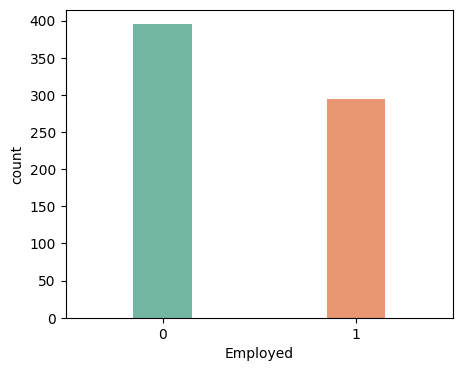

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x="Employed",data=dataset,width=0.3,palette='Set2')

In [4]:
input_data=dataset[['Gender', 'Age', 'Debt', 'Married', 'BankCustomer',  'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense',  'ZipCode', 'Income']]
output_data=dataset['Approved']

## Splitting the dataset into training and testing

In [5]:
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,test_size=0.2,random_state=10)

## Logistic Regression

In [6]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
print("accuracy of train data:",lr.score(x_test,y_test),"\naccuracy of train data:",lr.score(x_train,y_train))

accuracy of train data: 0.9057971014492754 
accuracy of train data: 0.8514492753623188


## Confusion matrix

In [9]:
cf=confusion_matrix(y_test,lr.predict(x_test))

<Axes: >

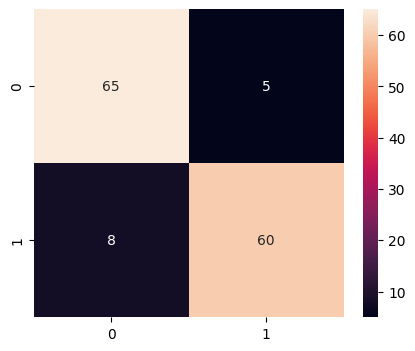

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cf,annot=True)

## precision score , recall score , f1 score

In [11]:
print("precision score :",precision_score(y_test,lr.predict(x_test)))
print("recall score    :",recall_score(y_test,lr.predict(x_test)))
print("f1 score        :",f1_score(y_test,lr.predict(x_test)))

precision score : 0.9230769230769231
recall score    : 0.8823529411764706
f1 score        : 0.9022556390977443


## Initially, the necessary libraries were imported, and the dataset was loaded. Subsequently, exploring the Dataset(EDA) was performed. The dataset was then divided into training and testing subsets, followed by the application of the following models:

### Logistic Regression: This model achieved the best accuracy, with training and testing accuracies of 0.90 and 0.85, respectively.

### After implementing the model, I calculated the precision score, recall score, and F1 score, which were quite impressive: 0.90, 0.88, and 0.90, respectively